<a href="https://colab.research.google.com/drive/1HiCE5cwKFhfMiugwGBfdJmtsh78BbN6F?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install pyod

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyod.models.knn import KNN
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

**Dataset Used:**

Breast Cancer

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In this cell, the Breast Cancer dataset is loaded from the sklearn.datasets module. The dataset is a commonly used example in machine learning for binary classification problems. The data (X) and target labels (y) are extracted from the cancer object. Displaying the cancer object provides an overview of the dataset, including feature names, the number of samples, and the number of features. This dataset will be used for demonstrating anomaly detection, treating certain samples as anomalies based on their target labels.

In [ ]:
# Introduce anomalies by adding outliers
np.random.seed(42)
outliers_index = np.random.choice(len(X), 10, replace=False)
X[outliers_index] += 10 * np.random.randn(10, 30)

# Create binary labels for normal (0) and anomalous (1) instances
labels = np.zeros(len(X))
labels[outliers_index] = 1

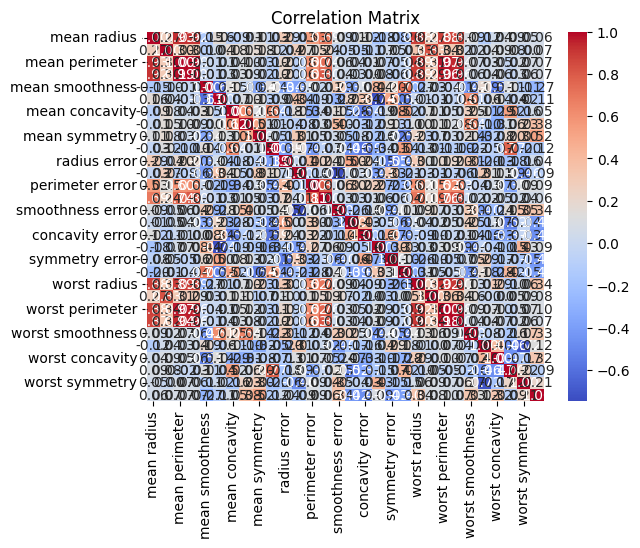

In [ ]:
# Additional EDA: Correlation Matrix
correlation_matrix = pd.DataFrame(X, columns=cancer.feature_names).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

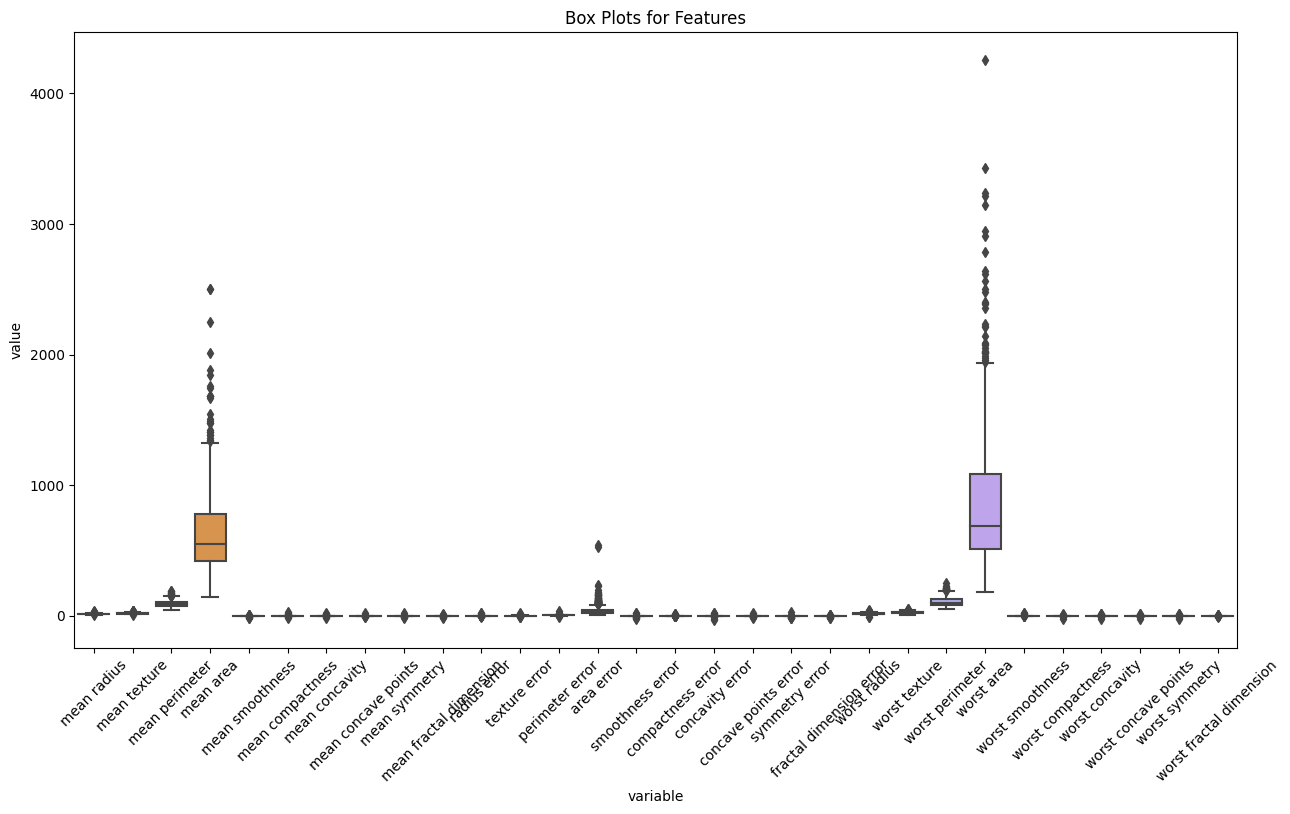

In [ ]:
# Additional EDA: Box plots for each feature
plt.figure(figsize=(15, 8))
sns.boxplot(x='variable', y='value', data=pd.melt(pd.DataFrame(X, columns=cancer.feature_names)))
plt.title('Box Plots for Features')
plt.xticks(rotation=45)
plt.show()

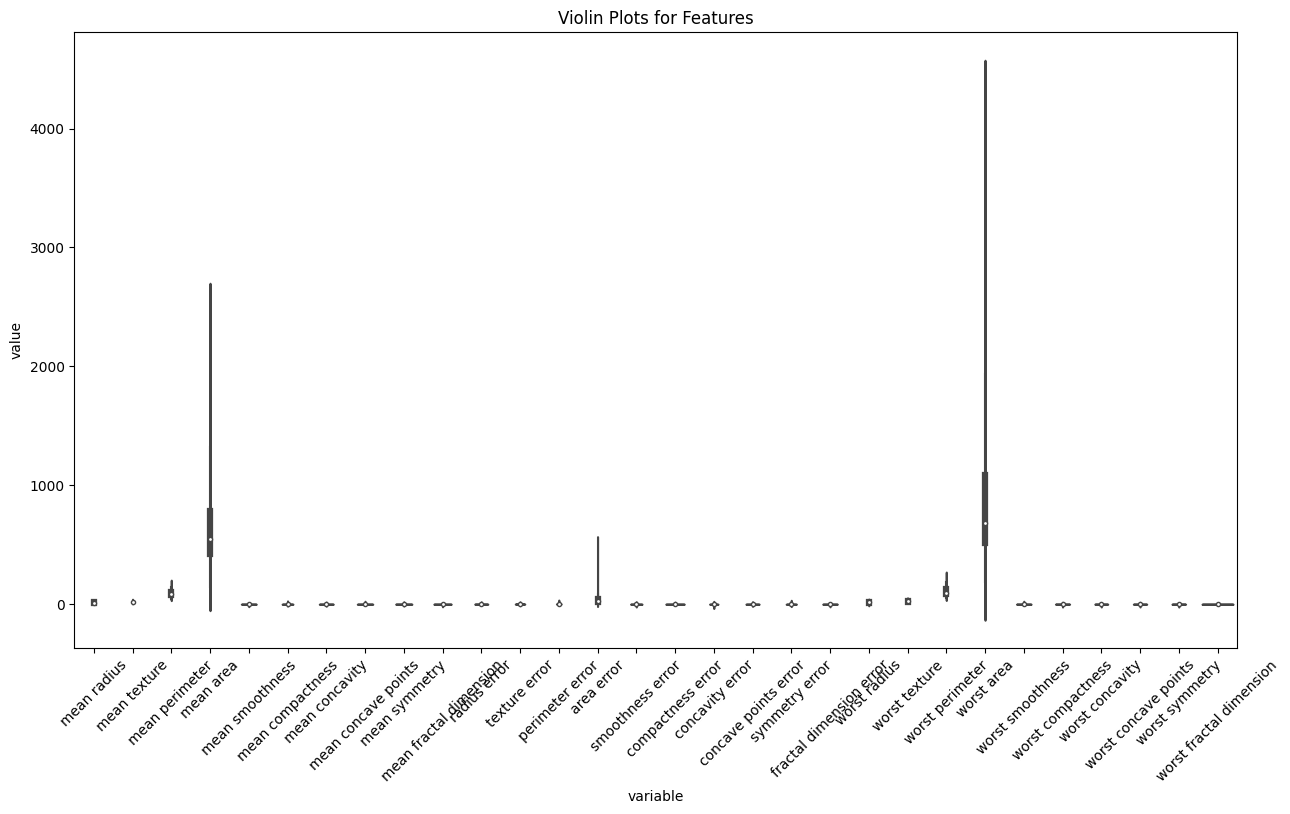

In [ ]:
# Additional EDA: Violin plots for each feature
plt.figure(figsize=(15, 8))
sns.violinplot(x='variable', y='value', data=pd.melt(pd.DataFrame(X, columns=cancer.feature_names)))
plt.title('Violin Plots for Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

This cell is dedicated to standardizing the features of the Breast Cancer dataset. The StandardScaler from the sklearn library is used, which normalizes the feature data such that each feature has a mean of 0 and a standard deviation of 1. This standardization is important in anomaly detection (and many other machine learning tasks), as it ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating. The fit_transform method applies the scaling to the dataset, and the standardized data is stored in X_scaled.

In [ ]:
# Train the KNN model for anomaly detection
model = KNN()
model.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

Here, an instance of the k-Nearest Neighbors (KNN) model for anomaly detection from the PyOD library is created and trained on the training data. This parameter helps the model in setting a threshold for outlier scores. The model is then trained using the fit method on the X_train dataset. KNN for anomaly detection works by calculating the distance of a point to its k nearest neighbors and using these distances to determine if a point is an outlier (anomaly).

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In this cell, the trained KNN model is used to predict anomalies in the test set. The predict method of the knn_model is applied to the X_test dataset, and the predictions are stored in y_test_pred. These predictions are binary labels with '1' indicating an anomaly and '0' indicating a normal observation. This step is crucial for evaluating the model's ability to generalize its anomaly detection capabilities to new, unseen data.

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.74      0.46        43
           1       0.42      0.11      0.18        71

    accuracy                           0.35       114
   macro avg       0.38      0.43      0.32       114
weighted avg       0.39      0.35      0.29       114



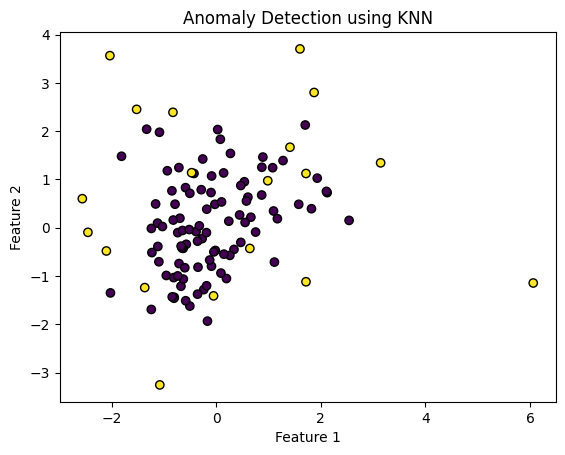

In [ ]:
# Visualize the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
plt.title('Anomaly Detection using KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()